In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import torch
import math
import random
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper
import torchtuples as tt
from torchtuples import Model
from sklearn.model_selection import train_test_split
from torch import nn, Tensor
import matplotlib.pyplot as plt
from scipy.stats import norm
import os
os.environ["R_HOME"] = f"{os.environ['CONDA_PREFIX']}\\Lib\\R"
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
importr('quantreg')

from pytorchtools import EarlyStopping
import torch.utils.data as Data	# 用于创建 DataLoader
import torch.nn as nn

from torch import nn, Tensor
from dqAux_new import dqNetSparse
from localrqgrid import lprq0g
from localrq import lprq0
from ph import ph
from bandwidthaic import bandwidthaic

In [2]:
#Generate GARCH(1,1)

B=500

MADE10=np.zeros(B)
MADE11=np.zeros(B)
MADE12=np.zeros(B)
MADE13=np.zeros(B)
MADE14=np.zeros(B)
MADE15=np.zeros(B)
MADE16=np.zeros(B)
MADE17=np.zeros(B)
MADE18=np.zeros(B)

MADE20=np.zeros(B)
MADE21=np.zeros(B)
MADE22=np.zeros(B)
MADE23=np.zeros(B)
MADE24=np.zeros(B)
MADE25=np.zeros(B)
MADE26=np.zeros(B)
MADE27=np.zeros(B)
MADE28=np.zeros(B)

MADE30=np.zeros(B)
MADE31=np.zeros(B)
MADE32=np.zeros(B)
MADE33=np.zeros(B)
MADE34=np.zeros(B)
MADE35=np.zeros(B)
MADE36=np.zeros(B)
MADE37=np.zeros(B)
MADE38=np.zeros(B)

MADE40=np.zeros(B)
MADE41=np.zeros(B)
MADE42=np.zeros(B)
MADE43=np.zeros(B)
MADE44=np.zeros(B)
MADE45=np.zeros(B)
MADE46=np.zeros(B)
MADE47=np.zeros(B)
MADE48=np.zeros(B)

#Define functional coefficients
def g10(x): return 1.5*np.exp(-3*(x+1)**2)+1*np.exp(-8*(x-1)**2)
def g11(x): return (0.15*np.exp(4*x)/(1+np.exp(4*x)))
def g12(x): return (0.04*(x)**2)
def g13(x): return (0.15*np.exp(-4*x)/(1+np.exp(-4*x)))
def g14(x): return (0.1*((np.cos(x))**2))
def g15(x): return (0.15*np.exp(4*x)/(1+np.exp(4*x)))
def g16(x): return (0.04*(x)**2)
def g17(x): return (0.15*np.exp(-4*x)/(1+np.exp(-4*x)))
def g18(x): return (0.1*((np.cos(x))**2))

def g20(x): return 1.5*np.exp(-3*(x-1)**2)+1*np.exp(-8*(x+1)**2)
def g21(x): return (0.1*np.sin(-0.8*np.pi*x)+0.1)
def g22(x): return (0.15*np.exp(4*x)/(1+np.exp(4*x)))
def g23(x): return (0.1*np.sin(-0.8*np.pi*x)+0.1)
def g24(x): return (0.15*np.exp(-4*x)/(1+np.exp(-4*x)))
def g25(x): return (0.1*np.sin(-0.8*np.pi*x)+0.1)
def g26(x): return (0.15*np.exp(4*x)/(1+np.exp(4*x)))
def g27(x): return (0.1*np.sin(-0.8*np.pi*x)+0.1)
def g28(x): return (0.15*np.exp(-4*x)/(1+np.exp(-4*x)))

def g30(x): return 1.5*np.exp(-3*(x+1)**2)+1*np.exp(-8*(x-1)**2)
def g31(x): return (0.1*np.sin(0.8*np.pi*x)+0.1)
def g32(x): return (0.1*np.cos(0.8*np.pi*x)+0.1)
def g33(x): return (0.1*np.sin(0.8*np.pi*x)+0.1)
def g34(x): return (0.1*np.cos(0.8*np.pi*x)+0.1)
def g35(x): return (0.1*np.sin(0.8*np.pi*x)+0.1)
def g36(x): return (0.1*np.cos(0.8*np.pi*x)+0.1)
def g37(x): return (0.1*np.sin(0.8*np.pi*x)+0.1)
def g38(x): return (0.1*np.cos(0.8*np.pi*x)+0.1)

def g40(x): return 1.5*np.exp(-3*(x-1)**2)+1*np.exp(-8*(x+1)**2)
def g41(x): return (0.1*np.cos(0.8*np.pi*x)+0.1)
def g42(x): return (0.1*np.sin(0.8*np.pi*x)+0.1)
def g43(x): return (0.1*np.cos(0.8*np.pi*x)+0.1)
def g44(x): return (0.1*np.sin(0.8*np.pi*x)+0.1)
def g45(x): return (0.1*np.cos(0.8*np.pi*x)+0.1)
def g46(x): return (0.1*np.sin(0.8*np.pi*x)+0.1)
def g47(x): return (0.1*np.cos(0.8*np.pi*x)+0.1)
def g48(x): return (0.1*np.sin(0.8*np.pi*x)+0.1)
    
tau=0.15
n=4000

for b in range(B):  
    
 index=np.zeros((n,1))
 coefx1=np.zeros((n,9))
 coefx2=np.zeros((n,9))
 coefx3=np.zeros((n,9))
 coefx4=np.zeros((n,9))
  
 Y1=np.zeros((n,1))
 Y1[0]=0
 stdev1=np.zeros((n,1))
 stdev1[0]=1
 Y2=np.zeros((n,1))
 Y2[0]=0
 stdev2=np.zeros((n,1))
 stdev2[0]=1
  
 Y3=np.zeros((n,1))
 Y3[0]=0
 stdev3=np.zeros((n,1))
 stdev3[0]=1
 Y4=np.zeros((n,1))
 Y4[0]=0
 stdev4=np.zeros((n,1))
 stdev4[0]=1 

 for j in range(2,(n+1)):
    
     index[j-1]=np.random.uniform(-2,2+10**-10,1)
     e1=np.random.uniform(0,1+10**-10,1)
     e2=np.random.uniform(0,1+10**-10,1)
     e3=np.random.uniform(0,1+10**-10,1)
     e4=np.random.uniform(0,1+10**-10,1)
     e31=(0.2*(e1)**2)+0.8
     e32=(0.2*np.exp(e1))+0.8
     e41=(0.2*(e2)**2)+0.8
     e42=(0.2*np.exp(e2))+0.8
     e51=(0.2*(e3)**2)+0.8
     e52=(0.2*np.exp(e3))+0.8
     e61=(0.2*(e4)**2)+0.8
     e62=(0.2*np.exp(e4))+0.8
    
     e5=np.random.normal(0,1,1)
     e6=np.random.normal(0,1,1)   
     e7=np.random.normal(0,1,1) 
     e8=np.random.normal(0,1,1) 

     coefx1[j-1,]=[g10(index[j-1]).item(),(g11(index[j-1])*e31).item(),(g12(index[j-1])*e32).item(),(g13(index[j-1])*e31).item(),(g14(index[j-1])*e32).item(),g15(index[j-1]).item(),g16(index[j-1]).item(),g17(index[j-1]).item(),g18(index[j-1]).item()]
     coefx2[j-1,]=[g20(index[j-1]).item(),(g21(index[j-1])*e41).item(),(g22(index[j-1])*e42).item(),(g23(index[j-1])*e41).item(),(g24(index[j-1])*e42).item(),g25(index[j-1]).item(),g26(index[j-1]).item(),g27(index[j-1]).item(),g28(index[j-1]).item()]
     coefx3[j-1,]=[g30(index[j-1]).item(),(g31(index[j-1])*e51).item(),(g32(index[j-1])*e52).item(),(g33(index[j-1])*e51).item(),(g34(index[j-1])*e52).item(),g35(index[j-1]).item(),g36(index[j-1]).item(),g37(index[j-1]).item(),g38(index[j-1]).item()]
     coefx4[j-1,]=[g40(index[j-1]).item(),(g41(index[j-1])*e61).item(),(g42(index[j-1])*e62).item(),(g43(index[j-1])*e61).item(),(g44(index[j-1])*e62).item(),g45(index[j-1]).item(),g46(index[j-1]).item(),g47(index[j-1]).item(),g48(index[j-1]).item()]
    
     stdev1[j-1]=np.dot(coefx1[j-1,],[1,stdev1[j-2].item(),stdev2[j-2].item(),stdev3[j-2].item(),stdev4[j-2].item(),np.absolute(Y1[j-2]).item(),np.absolute(Y2[j-2]).item(),np.absolute(Y3[j-2]).item(),np.absolute(Y4[j-2]).item()])
     stdev2[j-1]=np.dot(coefx2[j-1,],[1,stdev1[j-2].item(),stdev2[j-2].item(),stdev3[j-2].item(),stdev4[j-2].item(),np.absolute(Y1[j-2]).item(),np.absolute(Y2[j-2]).item(),np.absolute(Y3[j-2]).item(),np.absolute(Y4[j-2]).item()])
     stdev3[j-1]=np.dot(coefx3[j-1,],[1,stdev1[j-2].item(),stdev2[j-2].item(),stdev3[j-2].item(),stdev4[j-2].item(),np.absolute(Y1[j-2]).item(),np.absolute(Y2[j-2]).item(),np.absolute(Y3[j-2]).item(),np.absolute(Y4[j-2]).item()])
     stdev4[j-1]=np.dot(coefx4[j-1,],[1,stdev1[j-2].item(),stdev2[j-2].item(),stdev3[j-2].item(),stdev4[j-2].item(),np.absolute(Y1[j-2]).item(),np.absolute(Y2[j-2]).item(),np.absolute(Y3[j-2]).item(),np.absolute(Y4[j-2]).item()])
    
     Y1[j-1]=stdev1[j-1]*e5
     Y2[j-1]=stdev2[j-1]*e6
     Y3[j-1]=stdev3[j-1]*e7
     Y4[j-1]=stdev4[j-1]*e8
 
 Y1=Y1[1:n]
 Y2=Y2[1:n]
 Y3=Y3[1:n]
 Y4=Y4[1:n]
 stdev1=stdev1[1:n]
 stdev2=stdev2[1:n]
 stdev3=stdev3[1:n]
 stdev4=stdev4[1:n]
 index=index[1:n]
 n=np.size(index,0)
  
 ymax1=np.max(Y1)
 ymax2=np.max(Y2)
 ymin1=np.min(Y1)
 ymin2=np.min(Y2)
 ymax3=np.max(Y3)
 ymax4=np.max(Y4)
 ymin3=np.min(Y3)
 ymin4=np.min(Y4)

 yrange1=np.max(ymax1)-np.min(ymin1)
 yrange2=np.max(ymax2)-np.min(ymin2)
 yrange3=np.max(ymax3)-np.min(ymin3)
 yrange4=np.max(ymax4)-np.min(ymin4) 
    
 #Preliminary step
 L=1#int(np.floor(0.4*np.log(n)))
 preY=np.hstack((Y1,Y2,Y3,Y4))
 Y=np.hstack((Y1[(L+1):(n-1)],Y2[(L+1):(n-1)],Y3[(L+1):(n-1)],Y4[(L+1):(n-1)]))
 indexz=index[(L+1):(n-1)]
 kap=np.size(preY,1)
 preY11=np.zeros(((n-L-2),(kap*(L+1))))
 indexzz=np.zeros(((n-L-2),(L+1)))
  
 for lg in range(L+1):
    
   preY11[:,(kap*lg):(kap*(lg+1))]=np.absolute(preY[((L+1)-lg-1):(n-1-lg-1),:])
   indexzz[:,lg]=index[((L+1)-(lg)):((n-1)-(lg))].reshape(-1)

 nm0=np.zeros((L+2,1))
 nm0[0]=0
 for l in range(L+1):
   nm0[(l+1)]=nm0[l]+(l+1)+kap
 nm0[0]=0
 nm=nm0.astype(int)

 x_trainin=np.zeros((n-L-2,nm[L+1][0]))
 for ll in range(L+1):
   x_trainin[:,(nm[ll][0]):nm[(ll+1)][0]]=np.hstack((indexzz[:,0:(ll+1)],preY11[:,(kap*ll):(kap*(ll+1))]))

    
 # standardize covariates
 Y_1=torch.tensor(Y[:,0].reshape(-1,1).astype('float32'))
 Y_2=torch.tensor(Y[:,1].reshape(-1,1).astype('float32'))
 Y_3=torch.tensor(Y[:,2].reshape(-1,1).astype('float32'))
 Y_4=torch.tensor(Y[:,3].reshape(-1,1).astype('float32'))
 indexz=torch.tensor(indexz.astype('float32'))

 preY11=torch.tensor(preY11.astype('float32'))
 indexzz=torch.tensor(indexzz.astype('float32'))
 #x_train=torch.cat((indexzz,preY11),1) 
 x_test=torch.tensor(x_trainin.astype('float32'))
    
 # hyperparameters
 nodes = [2,128] # number of network layers and nodes per layer
 lr = 0.001
 epochs = 500
 verbose = False
 sparseRatio = 0.5

 # neural networks
 Netnew1=torch.load(r'E:/learning_python/weights/catdogclassifi_0.15_4000_1-%s.pth' % (239))
 sigmatile1=Netnew1(x_test).detach().numpy()

 Netnew2=torch.load(r'E:/learning_python/weights/catdogclassifi_0.15_4000_2-%s.pth' % (284))
 sigmatile2=Netnew2(x_test).detach().numpy() 

 Netnew3=torch.load(r'E:/learning_python/weights/catdogclassifi_0.15_4000_3-%s.pth' % (139))
 sigmatile3=Netnew3(x_test).detach().numpy()

 Netnew4=torch.load(r'E:/learning_python/weights/catdogclassifi_0.15_4000_4-%s.pth' % (187))
 sigmatile4=Netnew4(x_test).detach().numpy()

 sigmatile=np.hstack((sigmatile1,sigmatile2,sigmatile3,sigmatile4)) 
    
 #Step 2
 L1=1
 Ynew=np.hstack((Y1[(L+2):n],Y2[(L+2):n],Y3[(L+2):n],Y4[(L+2):n]))
 indexzz2=index[(L+2):n]
 ztile1=np.hstack((sigmatile,np.absolute(Y)))
  
 ymax1=np.max(Y1)
 ymax2=np.max(Y2)
 ymin1=np.min(Y1)
 ymin2=np.min(Y2)
 ymax3=np.max(Y3)
 ymax4=np.max(Y4)
 ymin3=np.min(Y3)
 ymin4=np.min(Y4)

 b11=0.06*19.17221
 b12=0.3*19.17221
 b21=0.06*19.41568
 b22=0.3*19.41568
  
 y_rangenew1=np.median(ymax1)-np.median(ymin1)
 h0cnew1=np.arange(b11*((n-L-L1-1)**-0.2),b12*((n-L-L1-1)**-0.2),0.2)
 y_rangenew2=np.median(ymax2)-np.median(ymin2)
 h0cnew2=np.arange(b21*((n-L-L1-1)**-0.2),b22*((n-L-L1-1)**-0.2),0.2)
 nh1=len(h0cnew1)
 nh2=len(h0cnew2)
 aicval1=np.zeros(nh1)
 aicval2=np.zeros(nh2)
 aicval3=np.zeros(nh1)
 aicval4=np.zeros(nh2)

 #for kk1 in range(nh1):
   #aic,RSSm=bandwidthaic(Ynew[:,0],ztile1,tau,h0cnew1[kk1],indexzz2,indexzz2)
   #aicval1[kk1]=aic
   #print(kk1)

 #ind5=np.argmin(aicval1)
 #hpf5=h0cnew1[ind5]  
 #hpf5
 hpf5=0.8190273  

 #for kk2 in range(nh2):
   #aic,RSSm=bandwidthaic(Ynew[:,1],ztile1,tau,h0cnew2[kk2],indexzz2,indexzz2)
   #aicval2[kk2]=aic
   #print(kk2)
  
 #ind6=np.argmin(aicval2)
 #hpf6=h0cnew2[ind6]
 #hpf6
 hpf6=0.8218088   

 #for kk3 in range(nh1):
   #aic,RSSm=bandwidthaic(Ynew[:,2],ztile1,tau,h0cnew1[kk3],indexzz2,indexzz2)
   #aicval3[kk3]=aic
   #print(kk3)
  
 #ind7=np.argmin(aicval3)
 #hpf7=h0cnew1[ind7]  
 #hpf7
 hpf7=0.8190273 

 #for kk4 in range(nh2):
   #aic,RSSm=bandwidthaic(Ynew[:,3],ztile1,tau,h0cnew2[kk4],indexzz2,indexzz2)
   #aicval4[kk4]=aic
   #print(kk4)
  
 #ind8=np.argmin(aicval4)
 #hpf8=h0cnew2[ind8]
 #hpf8
 hpf8=0.8218088

 grid=np.arange(-1.75,1.85,0.1)
 ngrid=len(grid)

 fv, dv, w0 = lprq0g(Ynew[:,0], ztile1, hpf5, tau, indexzz2, grid)
 ainfinal1=fv
 fv, dv, w0 = lprq0g(Ynew[:,1], ztile1, hpf6, tau, indexzz2, grid)
 ainfinal2=fv
  
 fv, dv, w0 = lprq0g(Ynew[:,2], ztile1, hpf7, tau, indexzz2, grid)
 ainfinal3=fv
 fv, dv, w0 = lprq0g(Ynew[:,3], ztile1, hpf8, tau, indexzz2, grid)
 ainfinal4=fv

 aintrue10=np.zeros(ngrid)
 aintrue11=np.zeros(ngrid)
 aintrue12=np.zeros(ngrid)
 aintrue13=np.zeros(ngrid)
 aintrue14=np.zeros(ngrid)
 aintrue15=np.zeros(ngrid)
 aintrue16=np.zeros(ngrid)
 aintrue17=np.zeros(ngrid)
 aintrue18=np.zeros(ngrid)
  
 aintrue20=np.zeros(ngrid)
 aintrue21=np.zeros(ngrid)
 aintrue22=np.zeros(ngrid)
 aintrue23=np.zeros(ngrid)
 aintrue24=np.zeros(ngrid)
 aintrue25=np.zeros(ngrid)
 aintrue26=np.zeros(ngrid)
 aintrue27=np.zeros(ngrid)
 aintrue28=np.zeros(ngrid)
  
 aintrue30=np.zeros(ngrid)
 aintrue31=np.zeros(ngrid)
 aintrue32=np.zeros(ngrid)
 aintrue33=np.zeros(ngrid)
 aintrue34=np.zeros(ngrid)
 aintrue35=np.zeros(ngrid)
 aintrue36=np.zeros(ngrid)
 aintrue37=np.zeros(ngrid)
 aintrue38=np.zeros(ngrid)
  
 aintrue40=np.zeros(ngrid)
 aintrue41=np.zeros(ngrid)
 aintrue42=np.zeros(ngrid)
 aintrue43=np.zeros(ngrid)
 aintrue44=np.zeros(ngrid)
 aintrue45=np.zeros(ngrid)
 aintrue46=np.zeros(ngrid)
 aintrue47=np.zeros(ngrid)
 aintrue48=np.zeros(ngrid)
    
 for k in range(ngrid):
    aintrue10[k]=g10(grid[k]).item()
    aintrue11[k]=g11(grid[k]).item()
    aintrue12[k]=g12(grid[k]).item()
    aintrue13[k]=g13(grid[k]).item()
    aintrue14[k]=g14(grid[k]).item()
    aintrue15[k]=g15(grid[k]).item()
    aintrue16[k]=g16(grid[k]).item()
    aintrue17[k]=g17(grid[k]).item()
    aintrue18[k]=g18(grid[k]).item()
    
  
 for k in range(ngrid):
    aintrue20[k]=g20(grid[k]).item()
    aintrue21[k]=g21(grid[k]).item()
    aintrue22[k]=g22(grid[k]).item()
    aintrue23[k]=g23(grid[k]).item()
    aintrue24[k]=g24(grid[k]).item()
    aintrue25[k]=g25(grid[k]).item()
    aintrue26[k]=g26(grid[k]).item()
    aintrue27[k]=g27(grid[k]).item()
    aintrue28[k]=g28(grid[k]).item()
    
  
 for k in range(ngrid):
    aintrue30[k]=g30(grid[k]).item()
    aintrue31[k]=g31(grid[k]).item()
    aintrue32[k]=g32(grid[k]).item()
    aintrue33[k]=g33(grid[k]).item()
    aintrue34[k]=g34(grid[k]).item()
    aintrue35[k]=g35(grid[k]).item()
    aintrue36[k]=g36(grid[k]).item()
    aintrue37[k]=g37(grid[k]).item()
    aintrue38[k]=g38(grid[k]).item()
    
  
 for k in range(ngrid):
    aintrue40[k]=g40(grid[k]).item()
    aintrue41[k]=g41(grid[k]).item()
    aintrue42[k]=g42(grid[k]).item()
    aintrue43[k]=g43(grid[k]).item()
    aintrue44[k]=g44(grid[k]).item()
    aintrue45[k]=g45(grid[k]).item()
    aintrue46[k]=g46(grid[k]).item()
    aintrue47[k]=g47(grid[k]).item()
    aintrue48[k]=g48(grid[k]).item()

 MADE10[b]=np.mean(np.absolute((ainfinal1[:,0])-(aintrue10*(norm.ppf(tau,0,1)))))
 MADE11[b]=np.mean(np.absolute((ainfinal1[:,1])-(aintrue11*((0.2*(tau)**2)+0.8))))
 MADE12[b]=np.mean(np.absolute((ainfinal1[:,2])-(aintrue12*((0.2*np.exp(tau))+0.8))))
 MADE13[b]=np.mean(np.absolute((ainfinal1[:,3])-(aintrue13*((0.2*(tau)**2)+0.8))))
 MADE14[b]=np.mean(np.absolute((ainfinal1[:,4])-(aintrue14*((0.2*np.exp(tau))+0.8))))
 MADE15[b]=np.mean(np.absolute((ainfinal1[:,5])-(aintrue15*(norm.ppf(tau,0,1)))))
 MADE16[b]=np.mean(np.absolute((ainfinal1[:,6])-(aintrue16*(norm.ppf(tau,0,1)))))
 MADE17[b]=np.mean(np.absolute((ainfinal1[:,7])-(aintrue17*(norm.ppf(tau,0,1)))))
 MADE18[b]=np.mean(np.absolute((ainfinal1[:,8])-(aintrue18*(norm.ppf(tau,0,1)))))
  
 MADE20[b]=np.mean(np.absolute((ainfinal2[:,0])-(aintrue20*(norm.ppf(tau,0,1)))))
 MADE21[b]=np.mean(np.absolute((ainfinal2[:,1])-(aintrue21*((0.2*(tau)**2)+0.8))))
 MADE22[b]=np.mean(np.absolute((ainfinal2[:,2])-(aintrue22*((0.2*np.exp(tau))+0.8))))
 MADE23[b]=np.mean(np.absolute((ainfinal2[:,3])-(aintrue23*((0.2*(tau)**2)+0.8))))
 MADE24[b]=np.mean(np.absolute((ainfinal2[:,4])-(aintrue24*((0.2*np.exp(tau))+0.8))))
 MADE25[b]=np.mean(np.absolute((ainfinal2[:,5])-(aintrue25*(norm.ppf(tau,0,1)))))
 MADE26[b]=np.mean(np.absolute((ainfinal2[:,6])-(aintrue26*(norm.ppf(tau,0,1)))))
 MADE27[b]=np.mean(np.absolute((ainfinal2[:,7])-(aintrue27*(norm.ppf(tau,0,1)))))
 MADE28[b]=np.mean(np.absolute((ainfinal2[:,8])-(aintrue28*(norm.ppf(tau,0,1)))))
   
 MADE30[b]=np.mean(np.absolute((ainfinal3[:,0])-(aintrue30*(norm.ppf(tau,0,1)))))
 MADE31[b]=np.mean(np.absolute((ainfinal3[:,1])-(aintrue31*((0.2*(tau)**2)+0.8))))
 MADE32[b]=np.mean(np.absolute((ainfinal3[:,2])-(aintrue32*((0.2*np.exp(tau))+0.8))))
 MADE33[b]=np.mean(np.absolute((ainfinal3[:,3])-(aintrue33*((0.2*(tau)**2)+0.8))))
 MADE34[b]=np.mean(np.absolute((ainfinal3[:,4])-(aintrue34*((0.2*np.exp(tau))+0.8))))
 MADE35[b]=np.mean(np.absolute((ainfinal3[:,5])-(aintrue35*(norm.ppf(tau,0,1)))))
 MADE36[b]=np.mean(np.absolute((ainfinal3[:,6])-(aintrue36*(norm.ppf(tau,0,1)))))
 MADE37[b]=np.mean(np.absolute((ainfinal3[:,7])-(aintrue37*(norm.ppf(tau,0,1)))))
 MADE38[b]=np.mean(np.absolute((ainfinal3[:,8])-(aintrue38*(norm.ppf(tau,0,1)))))
  
 MADE40[b]=np.mean(np.absolute((ainfinal4[:,0])-(aintrue40*(norm.ppf(tau,0,1)))))
 MADE41[b]=np.mean(np.absolute((ainfinal4[:,1])-(aintrue41*((0.2*(tau)**2)+0.8))))
 MADE42[b]=np.mean(np.absolute((ainfinal4[:,2])-(aintrue42*((0.2*np.exp(tau))+0.8))))
 MADE43[b]=np.mean(np.absolute((ainfinal4[:,3])-(aintrue43*((0.2*(tau)**2)+0.8))))
 MADE44[b]=np.mean(np.absolute((ainfinal4[:,4])-(aintrue44*((0.2*np.exp(tau))+0.8))))
 MADE45[b]=np.mean(np.absolute((ainfinal4[:,5])-(aintrue45*(norm.ppf(tau,0,1)))))
 MADE46[b]=np.mean(np.absolute((ainfinal4[:,6])-(aintrue46*(norm.ppf(tau,0,1)))))
 MADE47[b]=np.mean(np.absolute((ainfinal4[:,7])-(aintrue47*(norm.ppf(tau,0,1)))))
 MADE48[b]=np.mean(np.absolute((ainfinal4[:,8])-(aintrue48*(norm.ppf(tau,0,1)))))

 print(b)
     

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12256\1781657080.py:222: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Netnew1=torch.load(r'E:/learning_python/weights/ca

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [3]:
MMADE10=np.median(MADE10)
std10=np.std(MADE10)
MMADE11=np.median(MADE11)
std11=np.std(MADE11)
MMADE12=np.median(MADE12)
std12=np.std(MADE12)
MMADE13=np.median(MADE13)
std13=np.std(MADE13)
MMADE14=np.median(MADE14)
std14=np.std(MADE14)
MMADE15=np.median(MADE15)
std15=np.std(MADE15)
MMADE16=np.median(MADE16)
std16=np.std(MADE16)
MMADE17=np.median(MADE17)
std17=np.std(MADE17)
MMADE18=np.median(MADE18)
std18=np.std(MADE18)

MMADE20=np.median(MADE20)
std20=np.std(MADE20)
MMADE21=np.median(MADE21)
std21=np.std(MADE21)
MMADE22=np.median(MADE22)
std22=np.std(MADE22)
MMADE23=np.median(MADE23)
std23=np.std(MADE23)
MMADE24=np.median(MADE24)
std24=np.std(MADE24)
MMADE25=np.median(MADE25)
std25=np.std(MADE25)
MMADE26=np.median(MADE26)
std26=np.std(MADE26)
MMADE27=np.median(MADE27)
std27=np.std(MADE27)
MMADE28=np.median(MADE28)
std28=np.std(MADE28)

MMADE30=np.median(MADE30)
std30=np.std(MADE30)
MMADE31=np.median(MADE31)
std31=np.std(MADE31)
MMADE32=np.median(MADE32)
std32=np.std(MADE32)
MMADE33=np.median(MADE33)
std33=np.std(MADE33)
MMADE34=np.median(MADE34)
std34=np.std(MADE34)
MMADE35=np.median(MADE35)
std35=np.std(MADE35)
MMADE36=np.median(MADE36)
std36=np.std(MADE36)
MMADE37=np.median(MADE37)
std37=np.std(MADE37)
MMADE38=np.median(MADE38)
std38=np.std(MADE38)

MMADE40=np.median(MADE40)
std40=np.std(MADE40)
MMADE41=np.median(MADE41)
std41=np.std(MADE41)
MMADE42=np.median(MADE42)
std42=np.std(MADE42)
MMADE43=np.median(MADE43)
std43=np.std(MADE43)
MMADE44=np.median(MADE44)
std44=np.std(MADE44)
MMADE45=np.median(MADE45)
std45=np.std(MADE45)
MMADE46=np.median(MADE46)
std46=np.std(MADE46)
MMADE47=np.median(MADE47)
std47=np.std(MADE47)
MMADE48=np.median(MADE48)
std48=np.std(MADE48)

In [4]:
#v1
MMADE10

0.23879313573758754

In [5]:
std10

0.04778712651887989

In [6]:
MMADE11

0.10664287254915467

In [7]:
std11

0.03591278709822838

In [8]:
MMADE12

0.07268570555205656

In [9]:
std12

0.025895359396744214

In [10]:
MMADE13

0.10415313931531225

In [11]:
std13

0.03633576556316535

In [12]:
MMADE14

0.08577241286881379

In [13]:
std14

0.03125516306093233

In [14]:
MMADE15

0.05875403158084498

In [15]:
std15

0.02348495974469666

In [16]:
MMADE16

0.05250633780128097

In [17]:
std16

0.018172939664920434

In [18]:
MMADE17

0.04774749140872818

In [19]:
std17

0.017604899299407933

In [20]:
MMADE18

0.04047781270191558

In [21]:
std18

0.016294367524694438

In [22]:
#v2
MMADE20

0.2590136085081861

In [23]:
std20

0.04968025945554778

In [24]:
MMADE21

0.12419784951559992

In [25]:
std21

0.04509935428877889

In [26]:
MMADE22

0.0879615621238229

In [27]:
std22

0.03400076371876391

In [28]:
MMADE23

0.11890140354195186

In [29]:
std23

0.04354461688318313

In [30]:
MMADE24

0.10252461996729133

In [31]:
std24

0.03657149869264771

In [32]:
MMADE25

0.07802145979223979

In [33]:
std25

0.030621148336037816

In [34]:
MMADE26

0.05761827861561043

In [35]:
std26

0.02341472785112704

In [36]:
MMADE27

0.061462185033614086

In [37]:
std27

0.023043483811118096

In [38]:
MMADE28

0.056601961865796746

In [39]:
std28

0.02025045082435767

In [40]:
#v3
MMADE30

0.2793886853601509

In [41]:
std30

0.05636385625584821

In [42]:
MMADE31

0.13088142711702055

In [43]:
std31

0.04523102829205948

In [44]:
MMADE32

0.09581666466039124

In [45]:
std32

0.036461094006500806

In [46]:
MMADE33

0.12073547497789489

In [47]:
std33

0.0448849681437051

In [48]:
MMADE34

0.10363605060636305

In [49]:
std34

0.03930533856999707

In [50]:
MMADE35

0.07637790866439645

In [51]:
std35

0.02867156813461719

In [52]:
MMADE36

0.06233843957797098

In [53]:
std36

0.024119107940748934

In [54]:
MMADE37

0.06398931387214384

In [55]:
std37

0.022038397966698306

In [56]:
MMADE38

0.06357337669242749

In [57]:
std38

0.023152567099535146

In [58]:
#v4
MMADE40

0.26952113844534653

In [59]:
std40

0.05315959752299605

In [60]:
MMADE41

0.132699674976694

In [61]:
std41

0.047478645246534654

In [62]:
MMADE42

0.09784682028267083

In [63]:
std42

0.038420128287450526

In [64]:
MMADE43

0.1288982366799285

In [65]:
std43

0.045459854554771834

In [66]:
MMADE44

0.10780135842078863

In [67]:
std44

0.04083285930620798

In [68]:
MMADE45

0.07927977345738256

In [69]:
std45

0.03100560003297168

In [70]:
MMADE46

0.0657209041728529

In [71]:
std46

0.023821221229195683

In [72]:
MMADE47

0.06661111793220517

In [73]:
std47

0.02511353545176255

In [74]:
MMADE48

0.06656276018084042

In [75]:
std48

0.02172820453604268

In [76]:
np.mean(np.absolute((ainfinal1[:,1])-(aintrue11*((0.2*(tau)**2)+0.8))))

0.15149830676772957

In [77]:
np.mean(np.absolute((ainfinal1[:,2])-(aintrue12*((0.2*np.exp(tau))+0.8))))

0.09290548576231007

In [78]:
np.mean(np.absolute((ainfinal1[:,3])-(aintrue13*((0.2*(tau)**2)+0.8))))

0.1534855704342962

In [79]:
np.mean(np.absolute((ainfinal1[:,4])-(aintrue14*((0.2*np.exp(tau))+0.8))))

0.09424474587048604

In [80]:
np.mean(np.absolute((ainfinal2[:,1])-(aintrue21*((0.2*(tau)**2)+0.8))))

0.12895491292717964

In [81]:
np.mean(np.absolute((ainfinal2[:,2])-(aintrue22*((0.2*np.exp(tau))+0.8))))

0.12585058819672446

In [82]:
np.mean(np.absolute((ainfinal2[:,3])-(aintrue23*((0.2*(tau)**2)+0.8))))

0.14100511822827733

In [83]:
np.mean(np.absolute((ainfinal2[:,4])-(aintrue24*((0.2*np.exp(tau))+0.8))))

0.07304192342355625

In [84]:
np.mean(np.absolute((ainfinal3[:,1])-(aintrue31*((0.2*(tau)**2)+0.8))))

0.17710841935735278

In [85]:
np.mean(np.absolute((ainfinal3[:,2])-(aintrue32*((0.2*np.exp(tau))+0.8))))

0.14709802984911932

In [86]:
np.mean(np.absolute((ainfinal3[:,3])-(aintrue33*((0.2*(tau)**2)+0.8))))

0.08032688141031002

In [87]:
np.mean(np.absolute((ainfinal3[:,4])-(aintrue34*((0.2*np.exp(tau))+0.8))))

0.12639599775234175

In [88]:
np.mean(np.absolute((ainfinal4[:,1])-(aintrue41*((0.2*(tau)**2)+0.8))))

0.06946701008884057

In [89]:
np.mean(np.absolute((ainfinal4[:,2])-(aintrue42*((0.2*np.exp(tau))+0.8))))

0.07676449723651295

In [90]:
np.mean(np.absolute((ainfinal4[:,3])-(aintrue43*((0.2*(tau)**2)+0.8))))

0.06956780818355923

In [91]:
np.mean(np.absolute((ainfinal4[:,4])-(aintrue44*((0.2*np.exp(tau))+0.8))))

0.09265617723842189

In [92]:
c=np.arange(20).reshape(5,4)

In [93]:
c

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [94]:
np.median(Y1)

0.007668975723797499

In [95]:
c[:,2:4]

array([[ 2,  3],
       [ 6,  7],
       [10, 11],
       [14, 15],
       [18, 19]])

In [96]:
np.size(sigmatile1,0)

3797

ValueError: x and y must be the same size

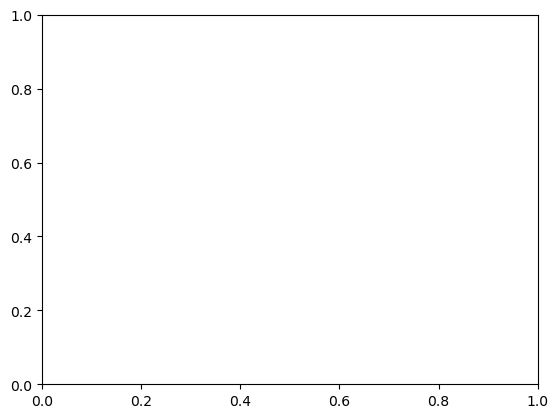

In [97]:
plt.scatter(range(3958),sigmatile2,s=2)

In [ ]:
plt.scatter(range(1,3988),(stdev1[(L+1):(n-1)]*(norm.ppf(tau,0,1))),s=2)

In [ ]:
ainfinal1